In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kenan\.cache\kagglehub\datasets\msambare\fer2013\versions\1


In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from torchvision import transforms

class FER2013Dataset(Dataset):
    def __init__(self, csv_file, usage="Training", transform=None):
        self.data = pd.read_csv(csv_file)
        self.data = self.data[self.data['Usage'] == usage]
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get pixels as a numpy array
        pixels = np.array(self.data.iloc[idx]['pixels'].split(), dtype='float32')
        image = pixels.reshape(48, 48)  # FER2013 images are 48x48

        # Convert to torch tensor
        if self.transform:
            image = self.transform(image)
        else:
            image = torch.tensor(image).unsqueeze(0) / 255.0  # Normalize to [0,1] and add channel dim

        label = int(self.data.iloc[idx]['emotion'])
        return image, label


Dataset folder structure:
1/
  test/
    angry/
      PrivateTest_10131363.jpg
      PrivateTest_10304478.jpg
      PrivateTest_1054527.jpg
      PrivateTest_10590091.jpg
      PrivateTest_1109992.jpg
      ... and 953 more files
    disgust/
      PrivateTest_11895083.jpg
      PrivateTest_19671520.jpg
      PrivateTest_21629266.jpg
      PrivateTest_22382996.jpg
      PrivateTest_26306320.jpg
      ... and 106 more files
    fear/
      PrivateTest_10153550.jpg
      PrivateTest_10254684.jpg
      PrivateTest_10306709.jpg
      PrivateTest_10555537.jpg
      PrivateTest_10629254.jpg
      ... and 1019 more files
    happy/
      PrivateTest_10077120.jpg
      PrivateTest_10470092.jpg
      PrivateTest_10513598.jpg
      PrivateTest_10516065.jpg
      PrivateTest_10613684.jpg
      ... and 1769 more files
    neutral/
      PrivateTest_10086748.jpg
      PrivateTest_10767287.jpg
      PrivateTest_11123843.jpg
      PrivateTest_11164800.jpg
      PrivateTest_11239107.jpg
      ... and 

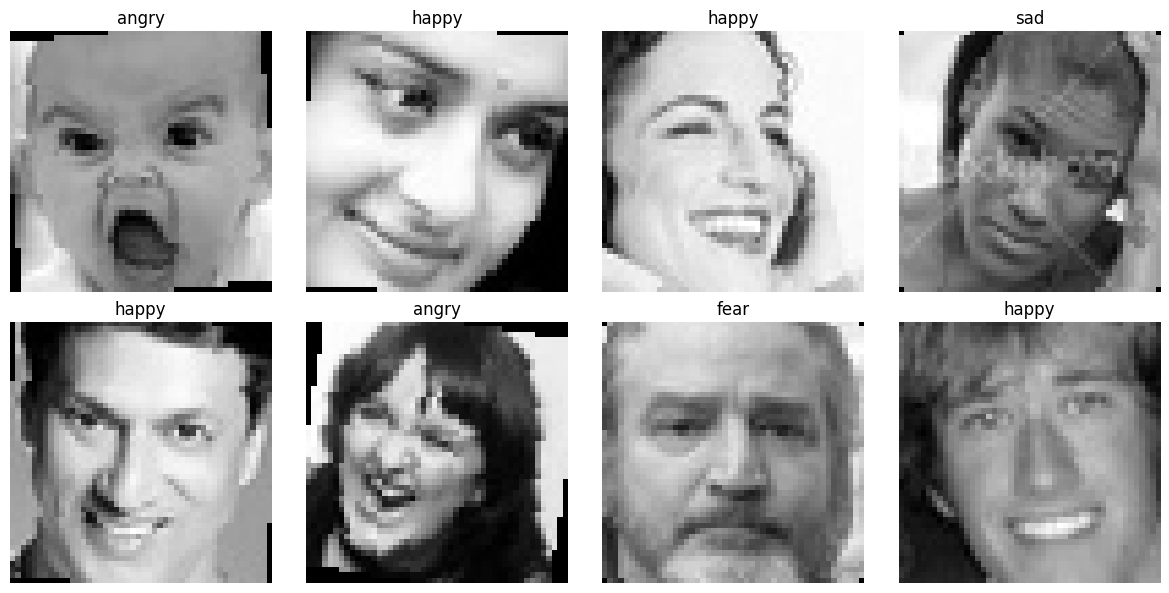


Training class distribution:
  angry: 3995 samples (13.9%)
  disgust: 436 samples (1.5%)
  fear: 4097 samples (14.3%)
  happy: 7215 samples (25.1%)
  neutral: 4965 samples (17.3%)
  sad: 4830 samples (16.8%)
  surprise: 3171 samples (11.0%)

Test class distribution:
  angry: 958 samples (13.3%)
  disgust: 111 samples (1.5%)
  fear: 1024 samples (14.3%)
  happy: 1774 samples (24.7%)
  neutral: 1233 samples (17.2%)
  sad: 1247 samples (17.4%)
  surprise: 831 samples (11.6%)

Testing batch loading...

Test class distribution:
  angry: 958 samples (13.3%)
  disgust: 111 samples (1.5%)
  fear: 1024 samples (14.3%)
  happy: 1774 samples (24.7%)
  neutral: 1233 samples (17.2%)
  sad: 1247 samples (17.4%)
  surprise: 831 samples (11.6%)

Testing batch loading...


c:\Users\kenan\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Batch 1:
  Images shape: torch.Size([32, 1, 48, 48])
  Labels shape: torch.Size([32])
  Labels: [6, 5, 4, 5, 4]
  Class names: ['surprise', 'sad', 'neutral', 'sad', 'neutral']

Found 5 samples of 'happy' emotion at indices: [8528, 8529, 8530, 8531, 8532]

Dataset loading complete! You can now use train_loader and test_loader for training.

Found 5 samples of 'happy' emotion at indices: [8528, 8529, 8530, 8531, 8532]

Dataset loading complete! You can now use train_loader and test_loader for training.


In [3]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Path to your dataset
dataset_path = r"C:\Users\kenan\.cache\kagglehub\datasets\msambare\fer2013\versions\1"

# Explore the folder structure
def explore_folder_structure(root_path):
    """Explore and display the folder structure"""
    print("Dataset folder structure:")
    for root, dirs, files in os.walk(root_path):
        level = root.replace(root_path, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 2 * (level + 1)
        for file in files[:5]:  # Show only first 5 files per folder
            print(f'{subindent}{file}')
        if len(files) > 5:
            print(f'{subindent}... and {len(files) - 5} more files')

explore_folder_structure(dataset_path)

# Define transforms
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Ensure grayscale
    transforms.Resize((48, 48)),  # Ensure correct size
    transforms.RandomHorizontalFlip(0.5),  # Data augmentation
    transforms.RandomRotation(10),  # Small rotation
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets using ImageFolder
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

print(f"\nLoading datasets...")
print(f"Train path: {train_path}")
print(f"Test path: {test_path}")

try:
    # Load train dataset
    train_dataset = datasets.ImageFolder(
        root=train_path,
        transform=transform_train
    )
    
    # Load test dataset
    test_dataset = datasets.ImageFolder(
        root=test_path,
        transform=transform_test
    )
    
    print(f"\nDatasets loaded successfully!")
    print(f"Training samples: {len(train_dataset)}")
    print(f"Test samples: {len(test_dataset)}")
    print(f"Number of classes: {len(train_dataset.classes)}")
    print(f"Class names: {train_dataset.classes}")
    print(f"Class to index mapping: {train_dataset.class_to_idx}")
    
except Exception as e:
    print(f"Error loading datasets: {e}")
    print("Please check if 'train' and 'test' folders exist in the dataset path")

# Create data loaders
batch_size = 32

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

print(f"\nData loaders created:")
print(f"Train batches: {len(train_loader)}")
print(f"Test batches: {len(test_loader)}")

# Function to show sample images
def show_sample_images(dataset, num_samples=8):
    """Display sample images from the dataset"""
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.ravel()
    
    # Get random samples
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    
    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        
        # Convert tensor to numpy for display
        if isinstance(image, torch.Tensor):
            img_np = image.squeeze().numpy()
            if image.min() < 0:  # If normalized to [-1, 1]
                img_np = (img_np + 1) / 2  # Convert back to [0, 1]
        
        axes[i].imshow(img_np, cmap='gray')
        axes[i].set_title(f'{dataset.classes[label]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Show sample images from training set
print("\nSample images from training set:")
show_sample_images(train_dataset)

# Function to check class distribution
def check_class_distribution(dataset, dataset_name):
    """Check the distribution of classes in the dataset"""
    class_counts = {}
    for _, label in dataset:
        class_name = dataset.classes[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1
    
    print(f"\n{dataset_name} class distribution:")
    total = sum(class_counts.values())
    for class_name, count in sorted(class_counts.items()):
        percentage = (count / total) * 100
        print(f"  {class_name}: {count} samples ({percentage:.1f}%)")
    
    return class_counts

# Check distribution for both datasets
train_dist = check_class_distribution(train_dataset, "Training")
test_dist = check_class_distribution(test_dataset, "Test")

# Test loading a batch
print("\nTesting batch loading...")
try:
    for batch_idx, (images, labels) in enumerate(train_loader):
        print(f"Batch {batch_idx + 1}:")
        print(f"  Images shape: {images.shape}")
        print(f"  Labels shape: {labels.shape}")
        print(f"  Labels: {labels[:5].tolist()}")  # Show first 5 labels
        
        # Convert labels to class names
        class_names = [train_dataset.classes[label.item()] for label in labels[:5]]
        print(f"  Class names: {class_names}")
        break
        
except Exception as e:
    print(f"Error in batch loading: {e}")

# Function to get specific samples by emotion
def get_samples_by_emotion(dataset, emotion_name, num_samples=5):
    """Get sample indices for a specific emotion"""
    if emotion_name not in dataset.classes:
        print(f"Emotion '{emotion_name}' not found in classes: {dataset.classes}")
        return []
    
    emotion_idx = dataset.class_to_idx[emotion_name]
    samples = []
    
    for i, (_, label) in enumerate(dataset):
        if label == emotion_idx and len(samples) < num_samples:
            samples.append(i)
        if len(samples) >= num_samples:
            break
    
    return samples

# Example: Get samples of happy faces
try:
    if 'happy' in [cls.lower() for cls in train_dataset.classes]:
        happy_class = next(cls for cls in train_dataset.classes if cls.lower() == 'happy')
        happy_samples = get_samples_by_emotion(train_dataset, happy_class, 5)
        print(f"\nFound {len(happy_samples)} samples of '{happy_class}' emotion at indices: {happy_samples}")
except:
    print("Could not find 'happy' class samples")

print("\nDataset loading complete! You can now use train_loader and test_loader for training.")

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations
transform = transforms.Compose([
    transforms.Grayscale(),        # Convert to 1 channel
    transforms.Resize((48, 48)),  # FER2013 images are 48x48
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(
    root=r"C:\Users\kenan\.cache\kagglehub\datasets\msambare\fer2013\versions\1\train",
    transform=transform
)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.ImageFolder(
    root=r"C:\Users\kenan\.cache\kagglehub\datasets\msambare\fer2013\versions\1\test",
    transform=transform
)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Class mapping
print(train_dataset.class_to_idx)


{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 6 * 6, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = F.relu(self.conv3(x))
        x = self.pool(x)

        x = x.view(-1, 128 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmotionCNN(num_classes=7).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [7]:
torch.cuda.is_available()

False

In [ ]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%")


Epoch 1/20, Loss: 1.6671, Accuracy: 32.99%
Epoch 2/20, Loss: 1.4257, Accuracy: 45.30%
Epoch 2/20, Loss: 1.4257, Accuracy: 45.30%


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100*correct/total:.2f}%")


Test Accuracy: 56.59%


In [ ]:
train_dataset

In [ ]:
import cv2
import os
import urllib.request
from IPython.display import clear_output, display
from PIL import Image
import time

# Download and load Haar Cascade for face detection
cascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
local_cascade = "haarcascade_frontalface_default.xml"
if not os.path.exists(local_cascade):
    print(f"Downloading cascade from {cascade_url}...")
    urllib.request.urlretrieve(cascade_url, local_cascade)
cascade_path = local_cascade

face_cascade = cv2.CascadeClassifier(cascade_path)
if face_cascade.empty():
    raise IOError(f"Failed to load cascade classifier from {cascade_path}")

# Map class indices to emotion labels
idx_to_emotion = {v: k for k, v in train_dataset.class_to_idx.items()}
print(f"Emotion mapping: {idx_to_emotion}")

# Start video capture
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Warning: Could not open camera. Using test image instead.")
    # Create a test image for demonstration
    test_frame = np.zeros((480, 640, 3), dtype=np.uint8)
    cv2.putText(test_frame, "No camera detected", (50, 240), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    display(Image.fromarray(cv2.cvtColor(test_frame, cv2.COLOR_BGR2RGB)))
else:
    print("Camera opened successfully! Starting emotion detection...")
    print("Note: This will run for 10 seconds, then stop automatically.")
    
    model.eval()
    start_time = time.time()
    frame_count = 0
    
    with torch.no_grad():
        try:
            while time.time() - start_time < 10:  # Run for 10 seconds
                ret, frame = cap.read()
                if not ret:
                    break

                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray, 1.3, 5)

                for (x, y, w, h) in faces:
                    roi_gray = gray[y:y+h, x:x+w]
                    roi_gray = cv2.resize(roi_gray, (48, 48))
                    roi = torch.tensor(roi_gray).unsqueeze(0).unsqueeze(0).float() / 255.0
                    roi = roi.to(device)

                    output = model(roi)
                    _, predicted = torch.max(output, 1)
                    emotion = idx_to_emotion[predicted.item()]

                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
                    cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)

                # Display frame every few frames to avoid overwhelming
                frame_count += 1
                if frame_count % 5 == 0:
                    clear_output(wait=True)
                    display(Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)))
                    
        except KeyboardInterrupt:
            print("Video interrupted by user.")
        finally:
            cap.release()
            print("Camera released. Emotion detection stopped.")

NameError: name 'train_dataset' is not defined

In [ ]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl (12.6 MB)

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   --------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.10.6 requires packaging>=20.0, which is not installed.


In [ ]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip uninstall opencv-python-headless

In [ ]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [ ]:
# Test OpenCV and face detection
import cv2
import os
import urllib.request
import numpy as np

# Download cascade file if needed
cascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
local_cascade = "haarcascade_frontalface_default.xml"
if not os.path.exists(local_cascade):
    print(f"Downloading cascade from {cascade_url}...")
    urllib.request.urlretrieve(cascade_url, local_cascade)
    print("Cascade downloaded successfully!")

# Test loading cascade
face_cascade = cv2.CascadeClassifier(local_cascade)
if face_cascade.empty():
    print("Failed to load cascade classifier")
else:
    print("Face cascade loaded successfully!")

# Test with a dummy image
test_img = np.zeros((480, 640), dtype=np.uint8)
faces = face_cascade.detectMultiScale(test_img, 1.3, 5)
print(f"Face detection test completed. Found {len(faces)} faces in test image.")

Face cascade loaded successfully!
Face detection test completed. Found 0 faces in test image.
